# Assignment Sheet 8
## Done by Nayan Man Singh Pradhan

In [1]:
# ## Importing
# import numpy as np
# import pandas as pd
# import random

In [2]:
# sigma = 1.15

# def f_exact(x):
#     return (x)**2

# def f_exact_with_noise(x):
#     noise = sigma**2
#     return (f_exact(x)+noise)

In [3]:
# # Random x from [-4,4] x 51

# # Generate 100 Training Data Set of 51 training samples
# data_set = []
# for i in range(100):
#     training_samples = []
#     for j in range(51):
#         x = random.uniform(-4,4)
#         y = f_exact_with_noise(x)
#         training_sample = [x,y]
#         training_samples.append(training_sample)
#     data_set.append(training_samples)

# # print(data_set[3][1]) ## testing

# ACTUAL

In [4]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)

mu = 0.0
sigma = 1.15
N = 51
N_T = 100
kMax = 20
f_exact = lambda x : x*x

x_0 = 0.5

In [6]:
X_train = dict()
y_train = dict()
f_exact_train = dict()
epsilon_train = dict()

errors = np.zeros(kMax)
biasSqs = np.zeros(kMax)
noises = np.zeros(kMax)
variances = np.zeros(kMax)
noise_variances = np.zeros(kMax)

In [7]:
for t in range(N_T):
    X_train[t] = (np.random.rand(N,1)*8.0)-4.0
    y_train[t] = np.zeros(N)
    y_train[t] = y_train[t].reshape(-1,1)
    epsilon_train[t] = np.random.normal(mu,sigma,N)
    epsilon_train[t] = epsilon_train[t].reshape(-1,1)
    y_train[t] = f_exact(X_train[t]) + epsilon_train[t]
    f_exact_train[t] = f_exact(X_train[t])

In [8]:
neigh = dict()

for k in range(1,kMax+1):

    exact_predictions = np.zeros(N_T)

    for t in range(N_T):
        neigh[t] = KNeighborsRegressor(n_neighbors=k)
#         neigh[t].fit(X_train[t], f_exact_train[t])
        neigh[t].fit(X_train[t], y_train[t])
        exact_predictions[t] = neigh[t].predict([[x_0]])
        
    E_T_exact_prediction = np.sum(exact_predictions) / N_T
    bias = E_T_exact_prediction - f_exact(x_0)

    noise_variance = sigma*sigma/k
    Var_T_exact_prediction = np.sum((exact_predictions - E_T_exact_prediction)**2) / (N_T-1)
    variance = Var_T_exact_prediction + noise_variance
    
    error = sigma*sigma + bias*bias + variance

    errors[k-1]=error
    biasSqs[k-1]=bias*bias
    variances[k-1]=variance
    noises[k-1]=sigma*sigma
#     noise_variances[k-1]=noise_variance

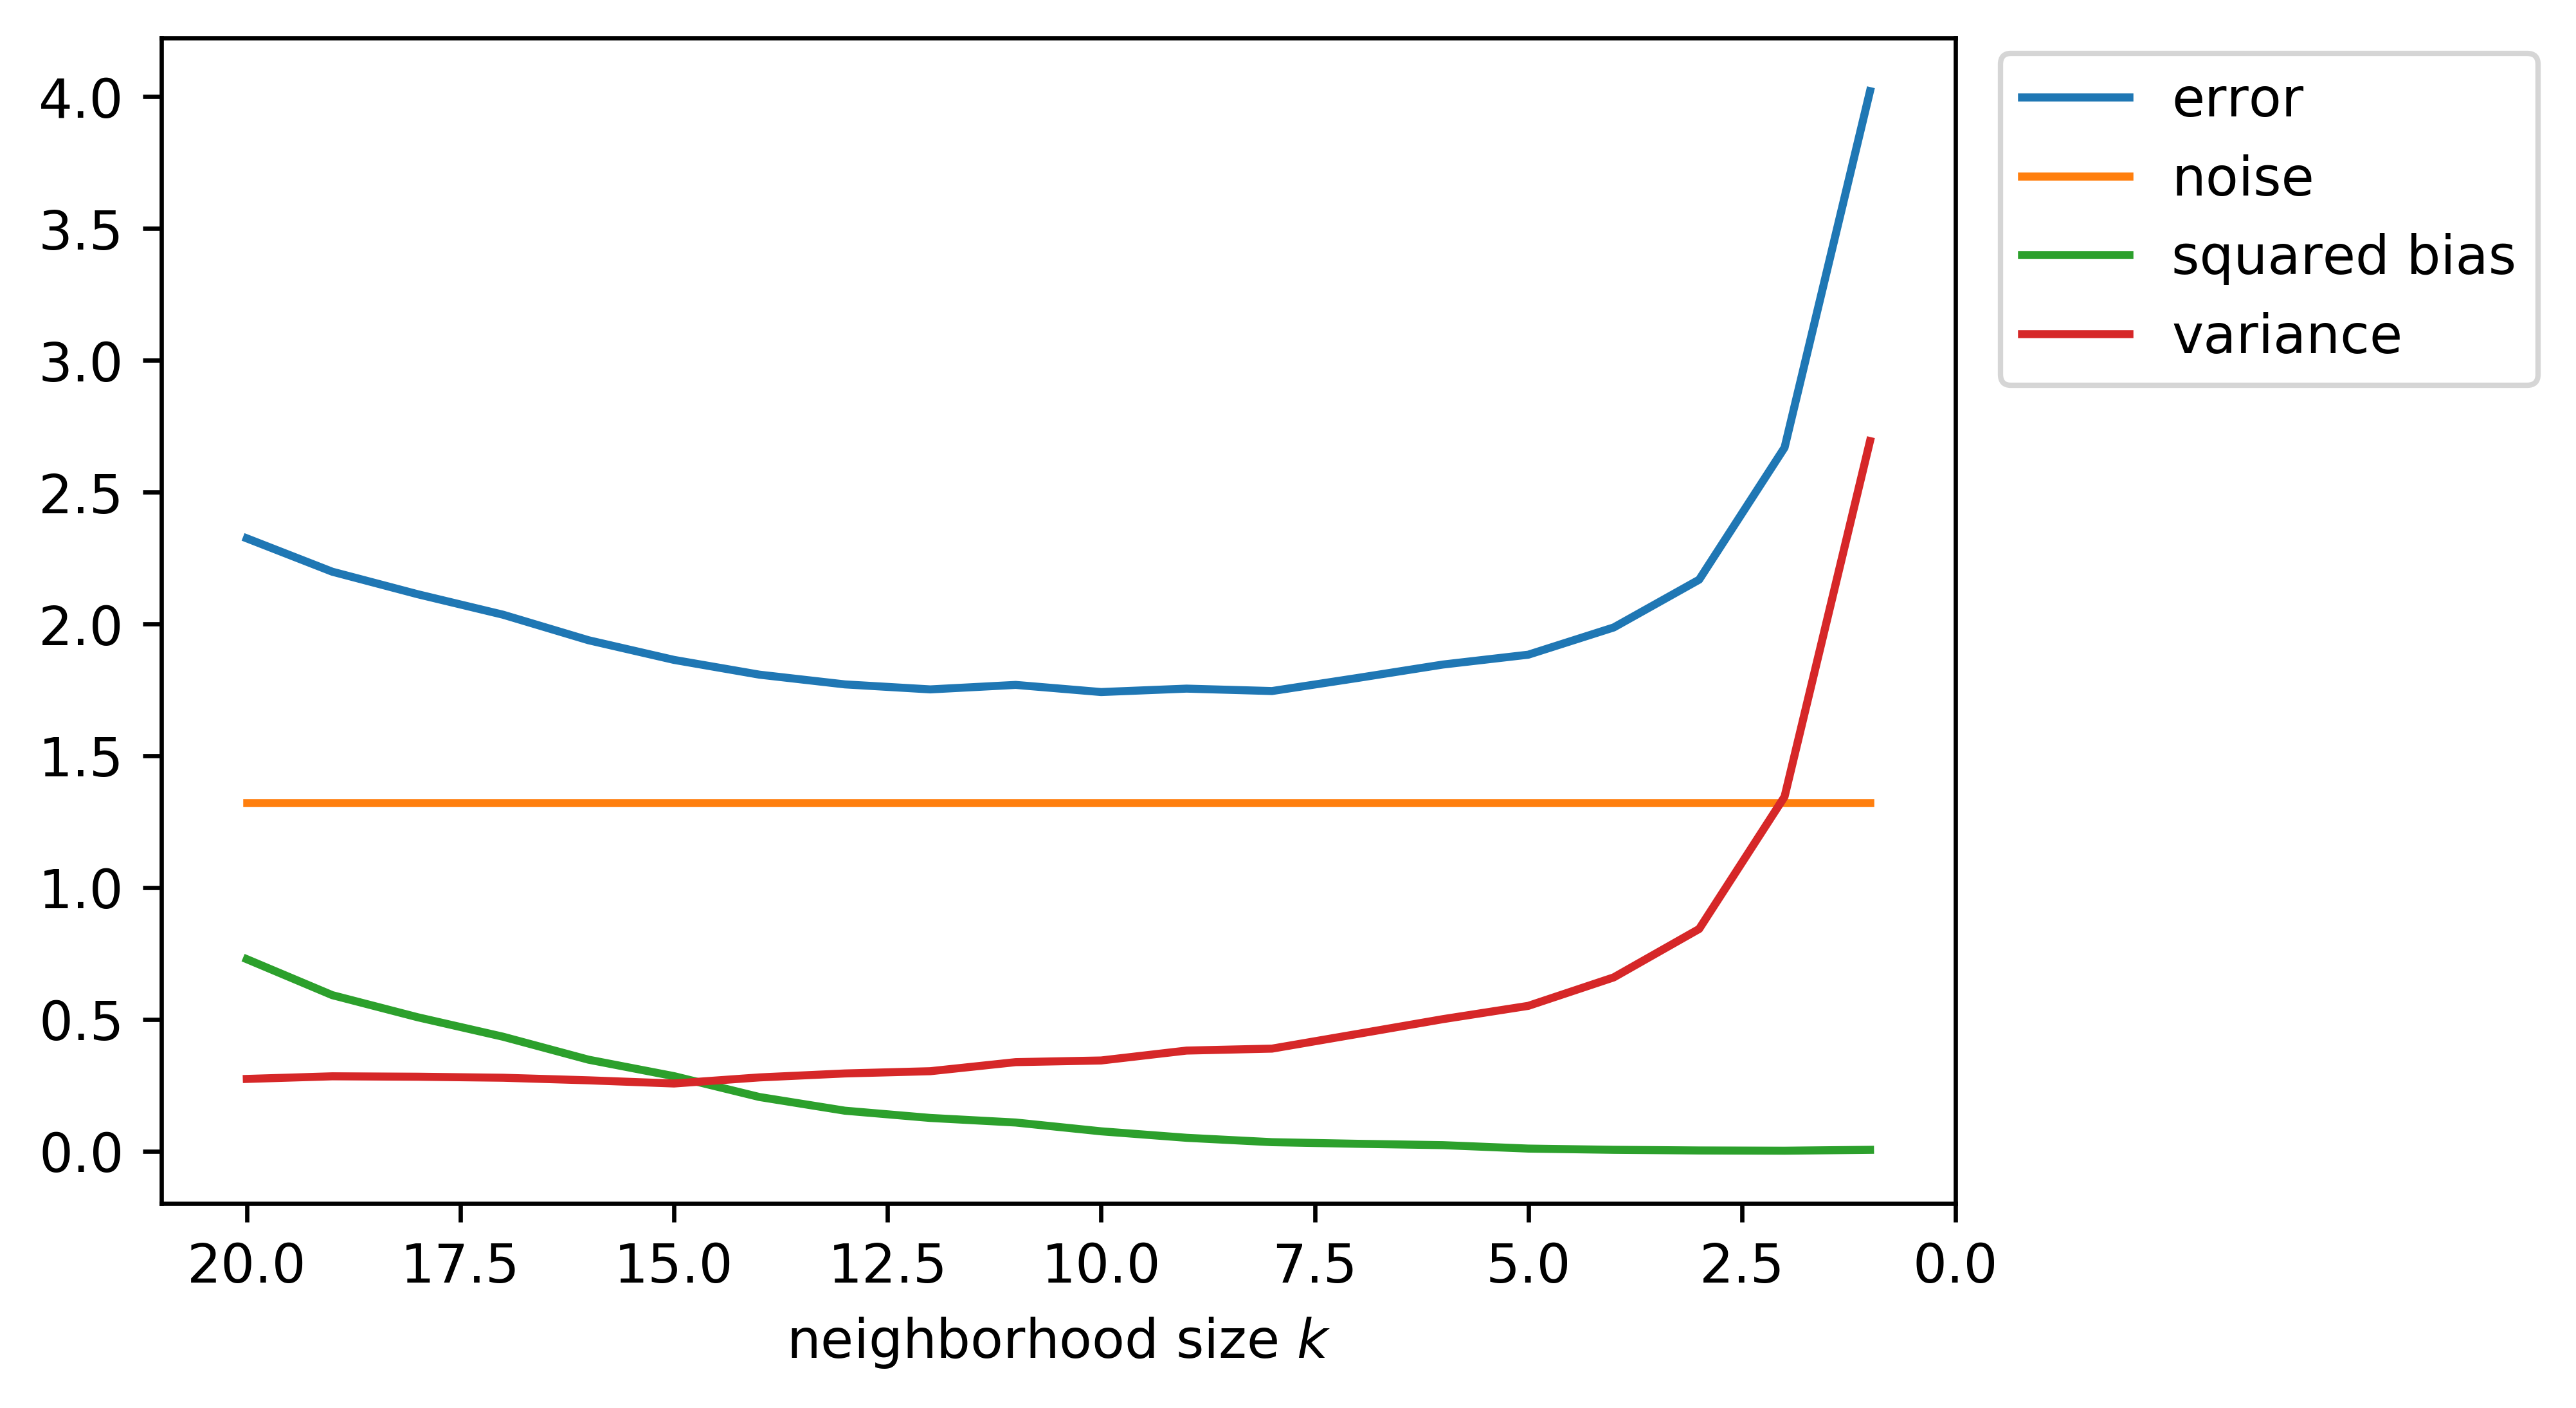

In [9]:
plt.figure(dpi=600)
plt.xlim(21,0)
plt.plot(np.linspace(1,kMax,kMax),errors, label="error")
plt.plot(np.linspace(1,kMax,kMax),noises, label="noise")
plt.plot(np.linspace(1,kMax,kMax),biasSqs, label="squared bias")
plt.plot(np.linspace(1,kMax,kMax),variances, label="variance")
# plt.plot(np.linspace(1,kMax,kMax),noise_variances, label="noise variance")
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.xlabel("neighborhood size $k$")
plt.show()